## Homework 10

In this homework, you are going to use the code from ```TrafficSignsClassification``` notebook and create your own traffic sign classifier.

### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

## Answers HW 10
 
### Step 1
Loaded from `data/subset_homework`  
**2220** images of `class_0` (Speed Limit 30)  
**2250** images of `class_1` (Speed Limit 50)

### Step 2
Achived accuracy **90% - 92%**

### Step 3
Variations (let's compare which is more efficient, adding only a neurons or only a layers)  
4 neurons, 1 layer --> Accuracy = **85% - 95%**  
2 neurons, 2 layers --> Accuracy = **85% - 95%**  

Results are similar, slightly less stable. Maybe for better accuracy needed more samples in dataset or using not only Dense layers (like Conv2D in next lesson14)

Accuracy reached about **97%** when increasing the number of epochs from 10 to 25

In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

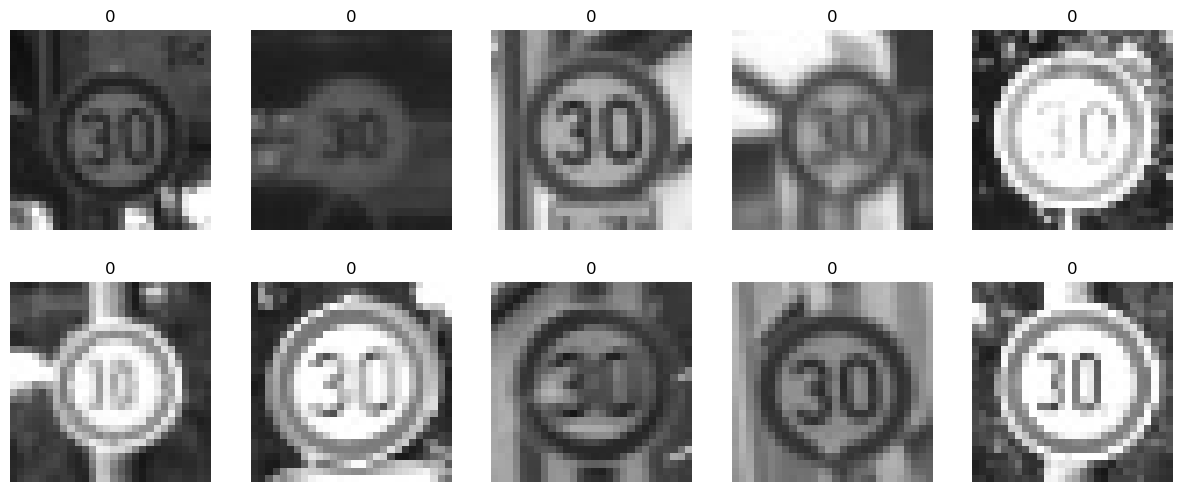

In [2]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

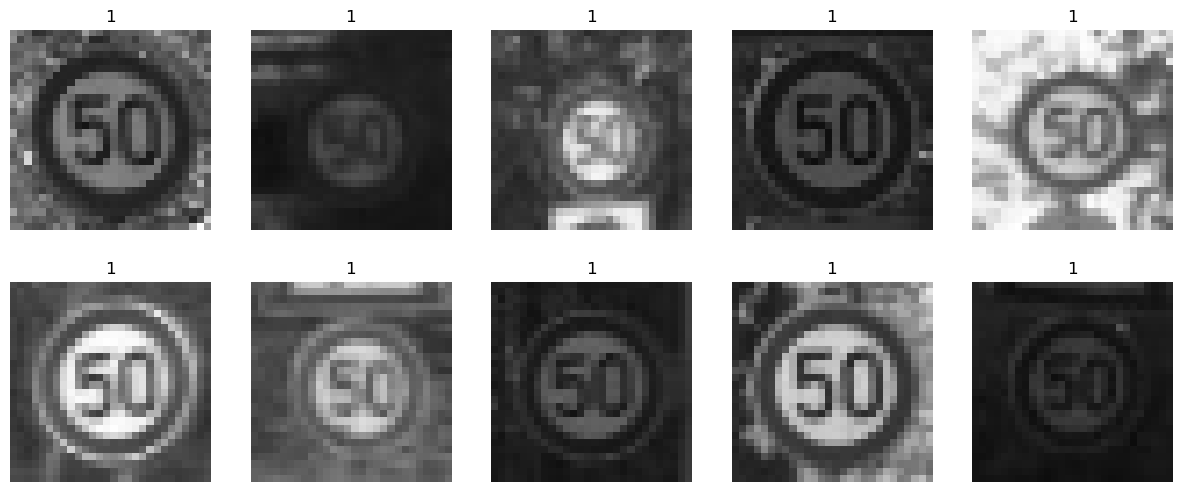

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


But now we have a problem. We cannot just feed the image to a neuron since the neuron inputs are flat (one dimensional). On the other hand, the images are 2D matrices. Therefore, we need to "flatten" the images to a one dimensional vector of pixels.

In [6]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 1.6412720680236816


Or, you know, just let make use of our friend numpy :-)

In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.024924516677856445


Before the training, let's again have a look at some raqndom samples from our dataset.

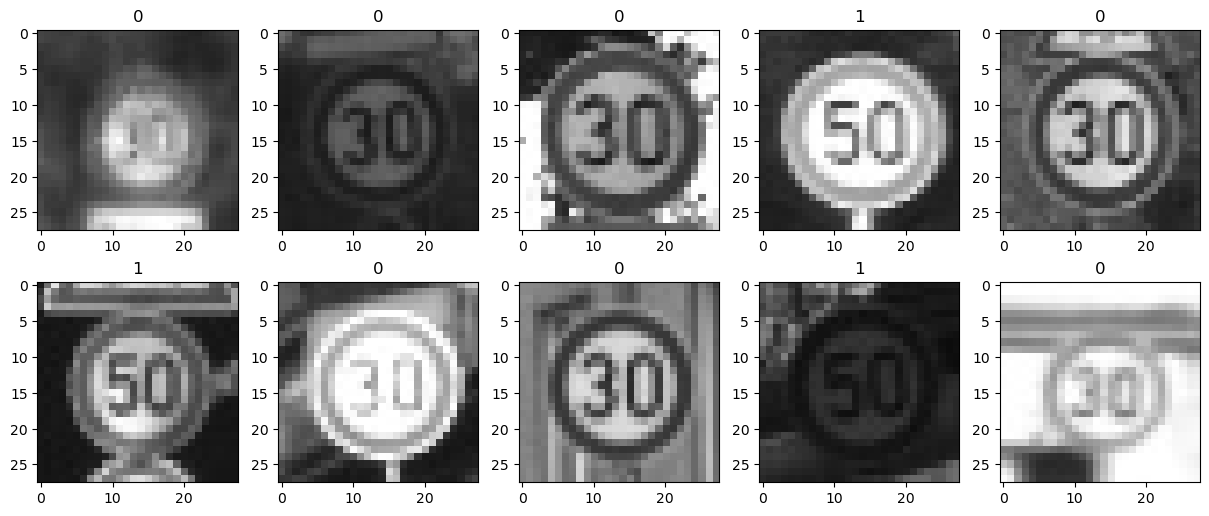

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Building the Neural Network

Let's now build our first (and yes, very simple) neural network using Tensorflow. For that, we will need a couple of new imports.

In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [10]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

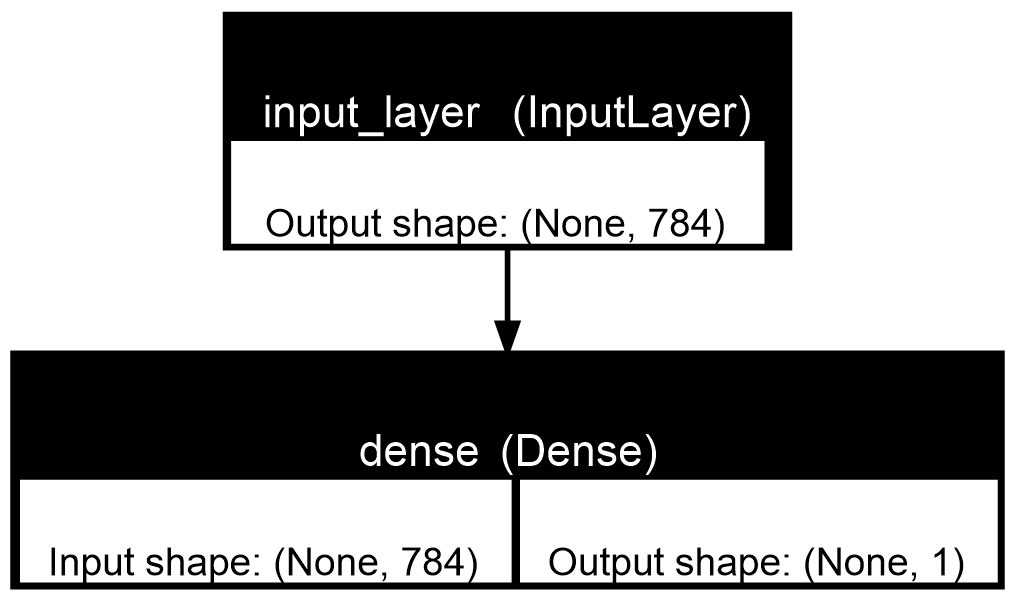

In [11]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Before starting the training, we have to compile the model. During the compilation, we indicate what optimizer we want to use and what loss should be applied for the minimization process.

In [12]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

And let's train :-)

In [13]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2835
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2147
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1732
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1500
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1310
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1191
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1111
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1034
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1039
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0986


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

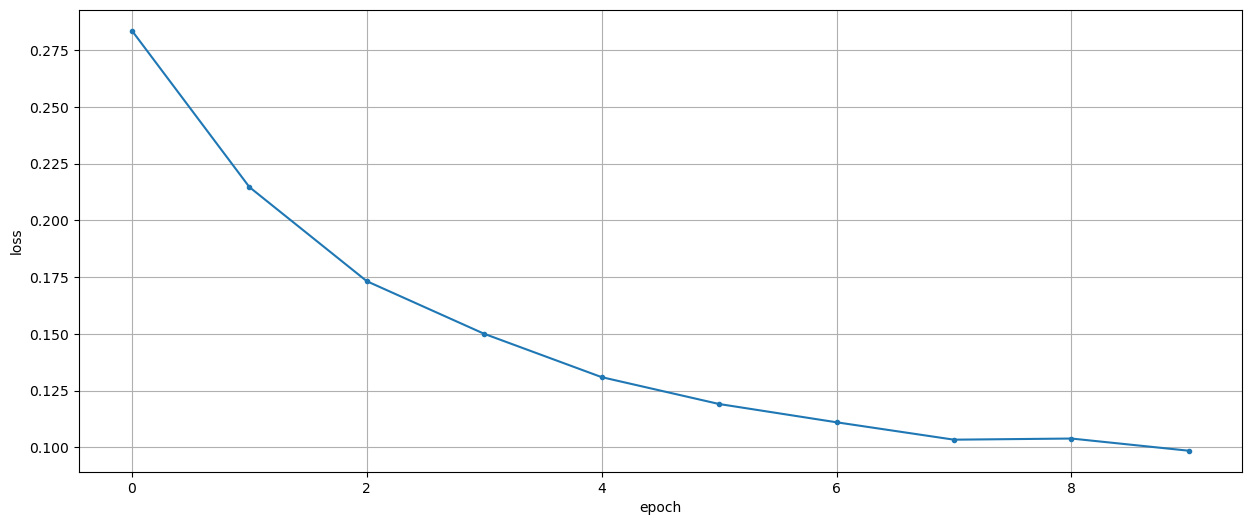

In [14]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.41259873] [0.41259873]


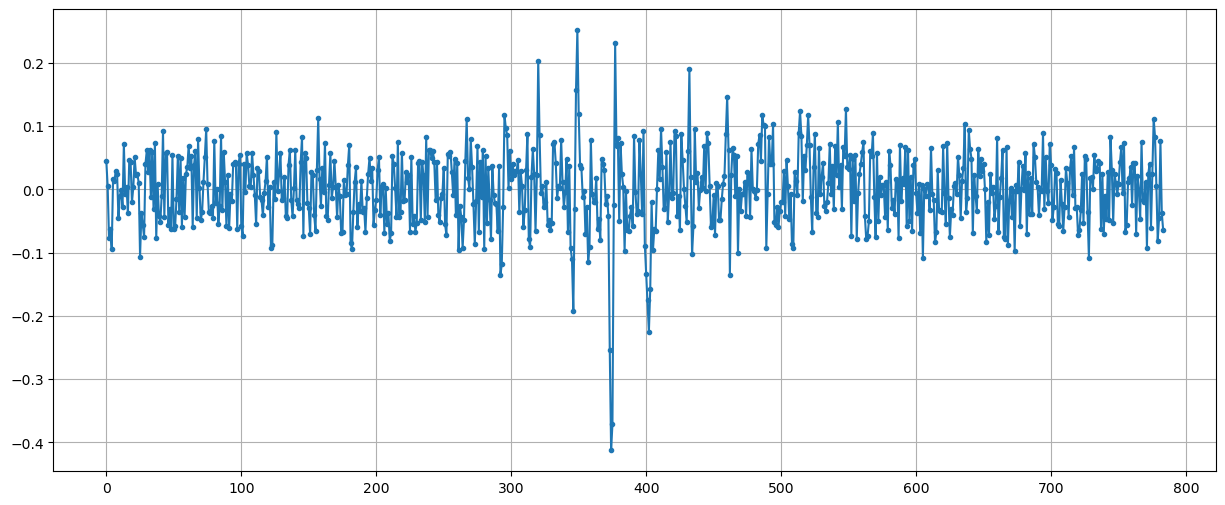

In [15]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

#### Performance Evaluation

Once our model is trained, we will can run it on our images to see how it performs (inference).

In [16]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.24721752]] 0


In [17]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()

# predicted labels are integer numbers (0 or 1) 
predictions = (predictions > 0.5).astype(int)

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


In [18]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.930648769574944


Accuracy in sample:  1.0


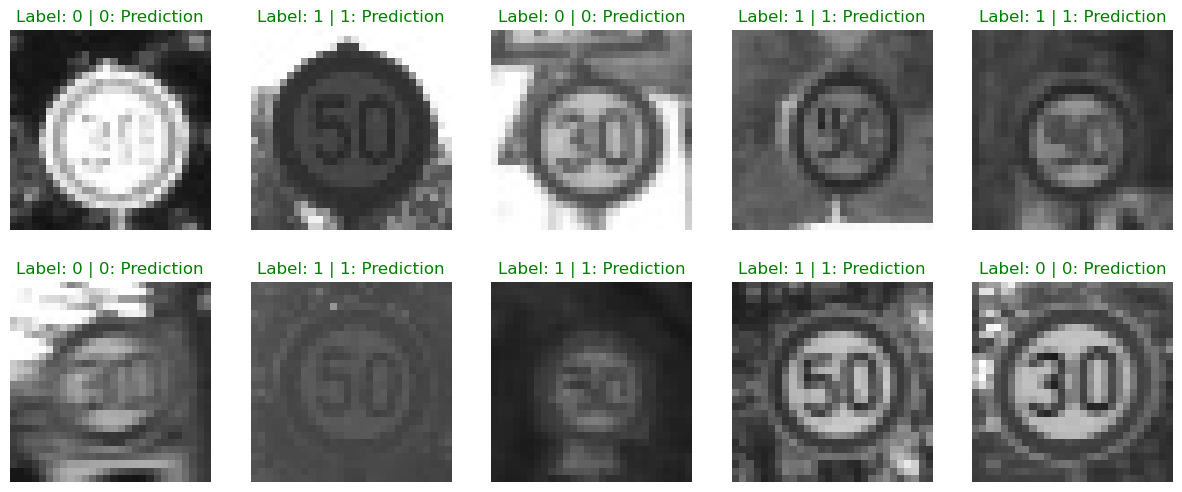

In [19]:
# Get random images for sample and show predictions
# Mark in red color false predictions
correct = 0

num_imgs = 10
row_length = 5

# calculating required number of rows to plot num_imgs by row_length  
plt_rows = (np.ceil(num_imgs/row_length)).astype(int)

for cnt, idx in enumerate(np.random.randint(0, len(images), num_imgs)): 
    if predictions[idx] == labels[idx]:
        correct += 1
        clr = 'green'
    else:
        clr = 'red'
    plt.subplot(plt_rows,row_length,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | ' + str(predictions[idx]) + ': Prediction', color=clr)
    plt.axis(False)
print('Accuracy in sample: ', correct/num_imgs)

### Variation 1: All data the same but using 4 neurons (1 hidden layer of 4 neurons)

In [20]:
# inputs remain the same
hidden41 = Dense(4, activation="relu")(inputs)
outputs41 = Dense(1, activation="sigmoid")(hidden41)
model41 = Model(inputs, outputs41)
model41.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model41.compile(optimizer ='adam', loss = 'mean_squared_error')
# model41.compile(optimizer ='adam', loss = 'binary_crossentropy')

In [22]:
history = model41.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2376
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2151
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1996
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1807
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1632
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1403
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1200
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1098
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0983
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0902


In [23]:
# Performance Evaluation on the entire dataset
predictions41 = model41.predict(pixels).squeeze()
predictions41 = (predictions41 > 0.5).astype(int)

correct = 0
for prediction41, label in zip(predictions41, labels):
    if prediction41 == label:
        correct = correct + 1

print('Accuracy_41 = ', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy_41 =  0.9281879194630872


### Variation 2: All data the same but using 4 neurons (2 hidden layer of 2 neurons each)


In [24]:
# inputs remain the same
hidden21 = Dense(2, activation="leaky_relu")(inputs)
hidden22 = Dense(2, activation="relu")(hidden21)
outputs22 = Dense(1, activation="sigmoid")(hidden22)
model22 = Model(inputs, outputs22)
model22.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,579 (6.17 KB)

 Trainable params: 1,579 (6.17 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model22.compile(optimizer ='adam', loss = 'mean_squared_error')

In [26]:
history = model22.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2456
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2301
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2089
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1778
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1479
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1267
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1073
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0973
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0857
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0807


In [27]:
# Performance Evaluation on the entire dataset
predictions22 = model22.predict(pixels).squeeze()
predictions22 = (predictions22 > 0.5).astype(int)

correct = 0
for prediction22, label in zip(predictions22, labels):
    if prediction22 == label:
        correct = correct + 1

print('Accuracy_22 = ', correct/len(labels))

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy_22 =  0.9304250559284116
